import modules

In [1]:
import torch as t
import matplotlib.pyplot as plt
import math
import time
from IPython import display
from cpm_model import model, pick_cells

/Users/esther-philinedorsch/opt/anaconda3/envs/torchenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cell_bg_adhesion = 1
target_volume = 3
vol_scaling = 1
target_perimeter = 8
perim_scaling = 1
temperature = 27

cell_params = {
    "cell_id": 1,
    "adhesion_penalties": {
        0: cell_bg_adhesion
    },
    "target_volume": target_volume,
    "vol_scaling": vol_scaling,
    "target_perimeter": target_perimeter,
    "perim_scaling": perim_scaling
}

grid = t.zeros((1, 3, 3))
grid[0,1,:] = 1
src_coords = (1,1)
target_coords = (0,1)


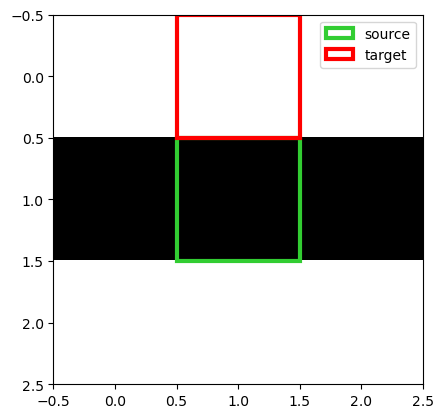

adhesion current: tensor([[18.]], dtype=torch.float64)
adhesion adjusted: tensor([[20.]], dtype=torch.float64)
volume current: tensor([0.])
volume adjusted: tensor([1.])
perimeter current: tensor([[100.]], dtype=torch.float64)
perimeter adjusted: tensor([[144.]], dtype=torch.float64)
h_diff: tensor([[47.]], dtype=torch.float64)
src: ((1, 1))
target: ((0, 1))
p_copy: tensor([[0.1754]], dtype=torch.float64)


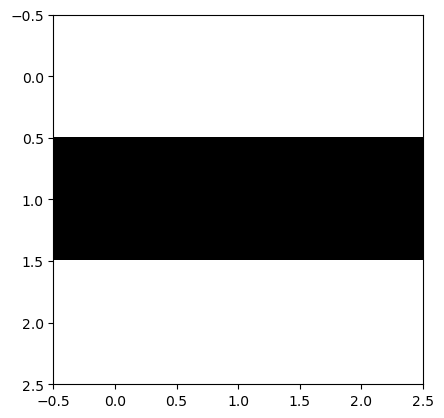

In [3]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
highlight_cell(src_coords[1],src_coords[0], color="limegreen", linewidth=3, label="source")
highlight_cell(target_coords[1], target_coords[0], color="red", linewidth=3, label="target")
plt.legend()
plt.show()

grid = model(grid, src_coords, target_coords, [cell_params], temperature=temperature)
plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

In [4]:
def step(grid, cell_params, temperature):
    fig, axs = plt.subplots(1,2)
    src_coords, target_coords = pick_cells(grid)
    axs[0].imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
    highlight_cell(src_coords[1],src_coords[0], ax=axs[0], color="limegreen", linewidth=3, label="source")
    highlight_cell(target_coords[1], target_coords[0], ax=axs[0], color="red", linewidth=3, label="target")
    axs[0].legend()

    grid = model(grid, src_coords, target_coords, [cell_params], temperature=temperature)
    axs[1].imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
    return grid
    

adhesion current: tensor([[14.]], dtype=torch.float64)
adhesion adjusted: tensor([[8.]], dtype=torch.float64)
volume current: tensor([1.])
volume adjusted: tensor([4.])
perimeter current: tensor([[36.]], dtype=torch.float64)
perimeter adjusted: tensor([[0.]], dtype=torch.float64)
h_diff: tensor([[-39.]], dtype=torch.float64)
src: ((2, 2))
target: ((1, 0))


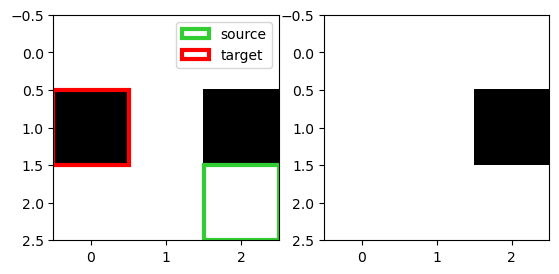

In [30]:
grid = step(grid, cell_params, temperature)

## define grid and seed cell

50


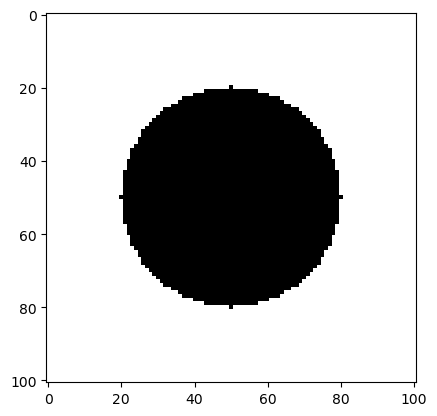

In [6]:
grid = t.zeros((1, 31, 31))

seed_radius = 30.
center = grid.shape[1]//2
print(center)
X = int(seed_radius) # R is the radius
for x in range(-X,X+1):
    Y = int(pow(seed_radius*seed_radius-x*x, 1/2)) # bound for y given x
    for y in range(-Y,Y+1):
        grid[0, center+x,center+y] = 1

plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

## define model params

In [7]:
cell_bg_adhesion = 1
target_volume = 380
vol_scaling = 1
target_perimeter = 219
perim_scaling = 1
temperature = 27

In [8]:
cell_params = {
    "cell_id": 1,
    "adhesion_penalties": {
        0: cell_bg_adhesion
    },
    "target_volume": target_volume,
    "vol_scaling": vol_scaling,
    "target_perimeter": target_perimeter,
    "perim_scaling": perim_scaling
}

## visualize the model

In [ ]:
for i in range(100):
  grid = step(grid, cell_params, temperature)
  display.display(plt.gcf())
  time.sleep(0.3)
  display.clear_output(wait=True)